# CNN on MNIST Data


In [1]:
import warnings
warnings.filterwarnings("ignore")
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

Using TensorFlow backend.


In [2]:
# https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


batch_size = 128
num_classes = 10
epochs = 20

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#print(x_train.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape, 'test samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(60000, 28, 28)
x_train shape: (60000, 28, 28, 1)
60000 train samples
(10000, 28, 28, 1) test samples


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dens

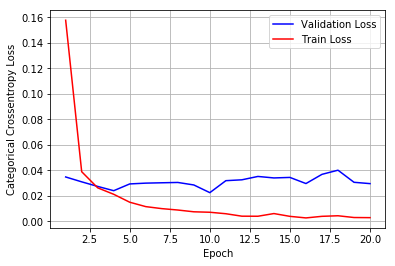

In [4]:
#Defining Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

#Compile and run Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


#Plotting Train and Test Loss

score = model.evaluate(x_test,y_test)
print('Test Score = ',score[0])
print('Accuract = ',score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
#history
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Layers and dropout

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
___________________________

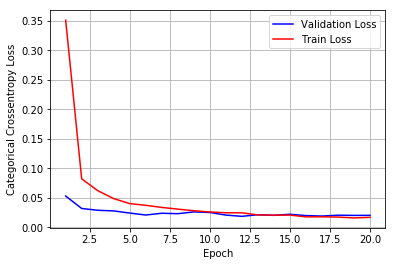

In [5]:
#Defining Model
#This is a 5 Layered model with Dropouts. Max Pooling has been peformed thrice

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))          
model.add(Dropout(0.30))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

#Compile and run Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

#Plotting Train and Test Loss

score = model.evaluate(x_test,y_test)
print('Test Score = ',score[0])
print('Accuract = ',score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))

#history.history
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 27, 27, 64)        8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 128)       32896     
__________

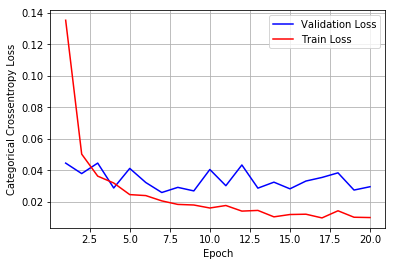

In [6]:
#Defining Model
#This is a 7 Layered model with Batch Normalization and Dropouts. Max Pooling has been peformed twice

model = Sequential()
model.add(Conv2D(32, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2,2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding = 'same'))
model.add(Conv2D(128, kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))


model.add(Conv2D(128, kernel_size=(2,2),activation='relu'))
model.add(Conv2D(128, kernel_size=(2,2 ),activation='relu'))
model.add(Conv2D(256, kernel_size=(2,2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))      
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

#Compile and run Model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


#Plotting Train and Test Loss

score = model.evaluate(x_test,y_test)
print('Test Score = ',score[0])
print('Accuract = ',score[1])
fig,ax=plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))

#history.history
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [7]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Number of layers", "BatchNormalization", "Dropout","Accuracy", "Test Loss"]

x.add_row(["3", 'No', 'No', 0.9934,0.032])
x.add_row(["5", 'No','Yes', 0.994,0.022])
x.add_row(["7", 'Yes', 'Yes',0.994,0.031])

print(x)

+------------------+--------------------+---------+----------+-----------+
| Number of layers | BatchNormalization | Dropout | Accuracy | Test Loss |
+------------------+--------------------+---------+----------+-----------+
|        3         |         No         |    No   |  0.9934  |   0.032   |
|        5         |         No         |   Yes   |  0.994   |   0.022   |
|        7         |        Yes         |   Yes   |  0.994   |   0.031   |
+------------------+--------------------+---------+----------+-----------+
